In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.5 MB/s 
     |████████████████████████████████| 17.0 MB 104 kB/s 
     |████████████████████████████████| 134 kB 44.5 MB/s 
     |████████████████████████████████| 1.7 MB 52.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 54.6 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 3.3 MB 45.2 MB/s 
     |████████████████████████████████| 2.0 MB 52.6 MB/s 
     |████████████████████████████████| 262 kB 64.1 MB/s 
     |████████████████████████████████| 167 kB 46.2 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 10.4 MB 39.2 MB/s 
     |████████████████████████████████|

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [3]:
import pandas as pd

dataset = pd.read_csv('customer-segmentation.csv')

In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

data

Data for Modeling: (2364, 10)
Unseen Data For Predictions: (263, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,464432,Male,No,25,No,Engineer,9.0,Low,2.0,Cat_3
1,460866,Male,No,26,Yes,Doctor,0.0,Low,9.0,Cat_4
2,466020,Male,Yes,86,No,Lawyer,0.0,Low,1.0,Cat_6
3,459911,Male,No,18,No,Healthcare,4.0,Low,6.0,Cat_2
4,466938,Male,Yes,59,Yes,Artist,8.0,Low,1.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2359,467802,Female,Yes,48,Yes,Artist,1.0,High,5.0,Cat_6
2360,461516,Male,Yes,31,Yes,Entertainment,1.0,Average,3.0,Cat_6
2361,459289,Male,No,42,Yes,Doctor,0.0,Low,1.0,Cat_6
2362,464794,Female,Yes,46,No,Engineer,8.0,Average,NaN,Cat_4


In [5]:
from pycaret.classification import *

mc = setup(data=data, target='Var_1', session_id=255, use_gpu=True)

,Description,Value
0,session_id,255
1,Target,Var_1
2,Target Type,Multiclass
3,Label Encoded,"Cat_1: 0, Cat_2: 1, Cat_3: 2, Cat_4: 3, Cat_5:..."
4,Original Data,"(2364, 10)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Var_1',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6990,0.7398,0.2493,0.6508,0.6475,0.3040,0.3394,2.438
lightgbm,Light Gradient Boosting Machine,0.6874,0.7262,0.2480,0.6274,0.6416,0.3048,0.3260,0.637
knn,K Neighbors Classifier,0.6868,0.6902,0.2632,0.6307,0.6497,0.3347,0.3474,0.206
lr,Logistic Regression,0.6514,0.4810,0.1429,0.4243,0.5139,0.0000,0.0000,0.086
dummy,Dummy Classifier,0.6514,0.5000,0.1429,0.4243,0.5139,0.0000,0.0000,0.071
ridge,Ridge Classifier,0.6508,0.0000,0.1602,0.5044,0.5471,0.0794,0.1236,0.037
rf,Random Forest Classifier,0.6478,0.6566,0.1748,0.5514,0.5627,0.1141,0.1506,1.311
lda,Linear Discriminant Analysis,0.6349,0.6609,0.1714,0.5313,0.5587,0.1197,0.1441,0.053
et,Extra Trees Classifier,0.5898,0.6129,0.1597,0.4945,0.5323,0.0743,0.0811,1.441
ada,Ada Boost Classifier,0.5831,0.5612,0.1584,0.5343,0.5292,0.0776,0.0901,0.203


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [8]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7134,0.7809,0.2740,0.6561,0.6725,0.3729,0.3975
1,0.7317,0.7396,0.2944,0.7343,0.6851,0.3870,0.4317
2,0.6951,0.7549,0.2396,0.6473,0.6515,0.3251,0.3510
3,0.6768,0.7687,0.2284,0.6287,0.6243,0.2505,0.2810
4,0.7134,0.7587,0.2532,0.6725,0.6608,0.3286,0.3727
5,0.7317,0.7863,0.2642,0.6658,0.6809,0.3829,0.4215
6,0.6951,0.6699,0.2403,0.6568,0.6398,0.2768,0.3209
7,0.6646,0.6543,0.2096,0.5938,0.5995,0.1982,0.2333
8,0.7055,0.7125,0.2476,0.6427,0.6449,0.2949,0.3405


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [9]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [10]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7012,0.7026,0.3019,0.6529,0.6686,0.3917,0.3995
1,0.6585,0.6654,0.2678,0.6059,0.6275,0.3094,0.3150
2,0.6829,0.7085,0.2605,0.6167,0.6456,0.3425,0.3519
3,0.7073,0.7019,0.2572,0.6390,0.6598,0.3494,0.3740
4,0.6768,0.7198,0.2475,0.6247,0.6430,0.3264,0.3357
5,0.7561,0.7426,0.3148,0.7028,0.7209,0.4769,0.4956
6,0.6707,0.6380,0.2548,0.6225,0.6354,0.2956,0.3079
7,0.6220,0.6461,0.1989,0.5516,0.5808,0.1873,0.1948
8,0.6810,0.7004,0.2565,0.6306,0.6455,0.3166,0.3263


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [11]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6463,0.5260,0.1429,0.4178,0.5075,0.0,0.0
1,0.6463,0.4325,0.1429,0.4178,0.5075,0.0,0.0
2,0.6463,0.4595,0.1429,0.4178,0.5075,0.0,0.0
3,0.6524,0.5093,0.1429,0.4257,0.5152,0.0,0.0
4,0.6524,0.5448,0.1429,0.4257,0.5152,0.0,0.0
5,0.6524,0.4974,0.1429,0.4257,0.5152,0.0,0.0
6,0.6524,0.4802,0.1429,0.4257,0.5152,0.0,0.0
7,0.6524,0.5040,0.1429,0.4257,0.5152,0.0,0.0
8,0.6564,0.3845,0.1429,0.4309,0.5203,0.0,0.0


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=255, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [12]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6951,0.7551,0.2325,0.6278,0.6419,0.3175,0.3460
1,0.6524,0.7272,0.2188,0.5836,0.6097,0.2625,0.2738
2,0.6646,0.7315,0.2378,0.6173,0.6315,0.3032,0.3127
3,0.6463,0.7225,0.2257,0.5818,0.6090,0.2565,0.2635
4,0.6829,0.6913,0.2512,0.6545,0.6426,0.3131,0.3276
5,0.6646,0.7403,0.2099,0.5804,0.6114,0.2507,0.2683
6,0.6768,0.6723,0.2060,0.5919,0.6067,0.2267,0.2663
7,0.6159,0.6436,0.2048,0.5457,0.5685,0.1374,0.1476
8,0.6626,0.6352,0.2039,0.5760,0.6059,0.2135,0.2359


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


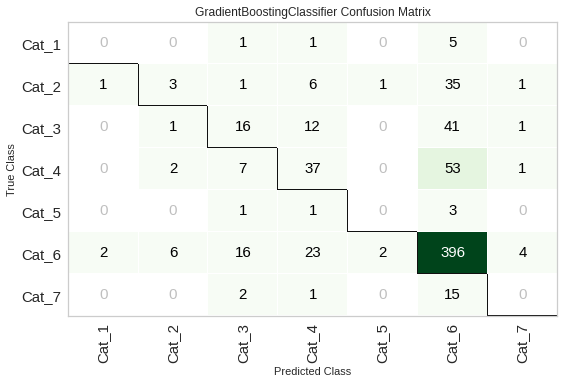

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
plot_model(tuned_gbc, plot='confusion_matrix')

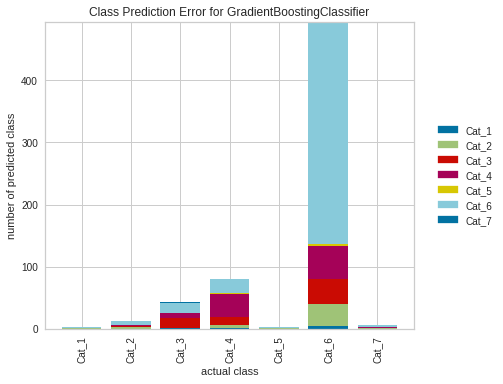

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
plot_model(tuned_gbc, plot='error')

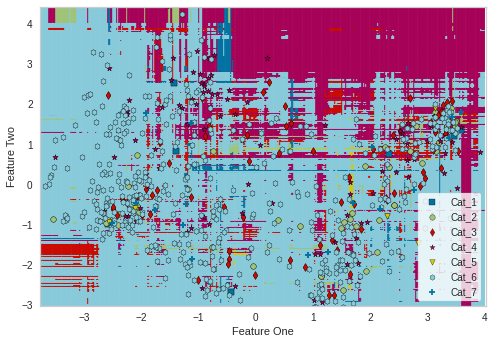

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(tuned_gbc, plot = 'boundary')

In [16]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
predict_model(tuned_gbc)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Prelo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6476,0.7278,0.22,0.5845,0.6048,0.2508,0.2631


,ID,Age,Gender_Female,Ever_Married_No,Ever_Married_Yes,Ever_Married_not_available,Graduated_No,Graduated_Yes,Graduated_not_available,Profession_Artist,...,Family_Size_4.0,Family_Size_5.0,Family_Size_6.0,Family_Size_7.0,Family_Size_8.0,Family_Size_9.0,Family_Size_not_available,Var_1,Label,Score
0,461299.0,75.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cat_6,Cat_6,0.9934
1,459369.0,41.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Cat_4,Cat_6,0.7152
2,461326.0,40.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cat_6,Cat_6,0.7208
3,461690.0,33.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cat_4,Cat_4,0.7085
4,465333.0,37.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cat_7,Cat_6,0.9036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,463438.0,47.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cat_6,Cat_6,0.8757
694,459307.0,60.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cat_6,Cat_6,0.9991
695,464864.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Cat_4,Cat_4,0.6930
696,461423.0,32.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cat_4,Cat_6,0.7659


In [18]:
final_gbc = finalize_model(tuned_gbc)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
       

In [19]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=255, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Prelo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0,0,0,0,0,0


In [20]:
unseen_predictions.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Label,Score
0,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,Cat_6,0.9626
1,459016,Female,No,22,No,Healthcare,0.0,Low,6.0,Cat_6,Cat_6,0.9102
2,459026,Male,No,27,No,Healthcare,8.0,Low,3.0,Cat_3,Cat_6,0.9534
3,459039,Male,Yes,45,Yes,Artist,1.0,Average,2.0,Cat_6,Cat_6,0.9827
4,459041,Male,Yes,55,Yes,Artist,8.0,Low,1.0,Cat_6,Cat_6,0.9944
